#Analysing Churn


In [11]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer

# Upload the Excel file
uploaded = files.upload()


Saving BA - Assignment Part 1 data set.xlsx to BA - Assignment Part 1 data set (5).xlsx


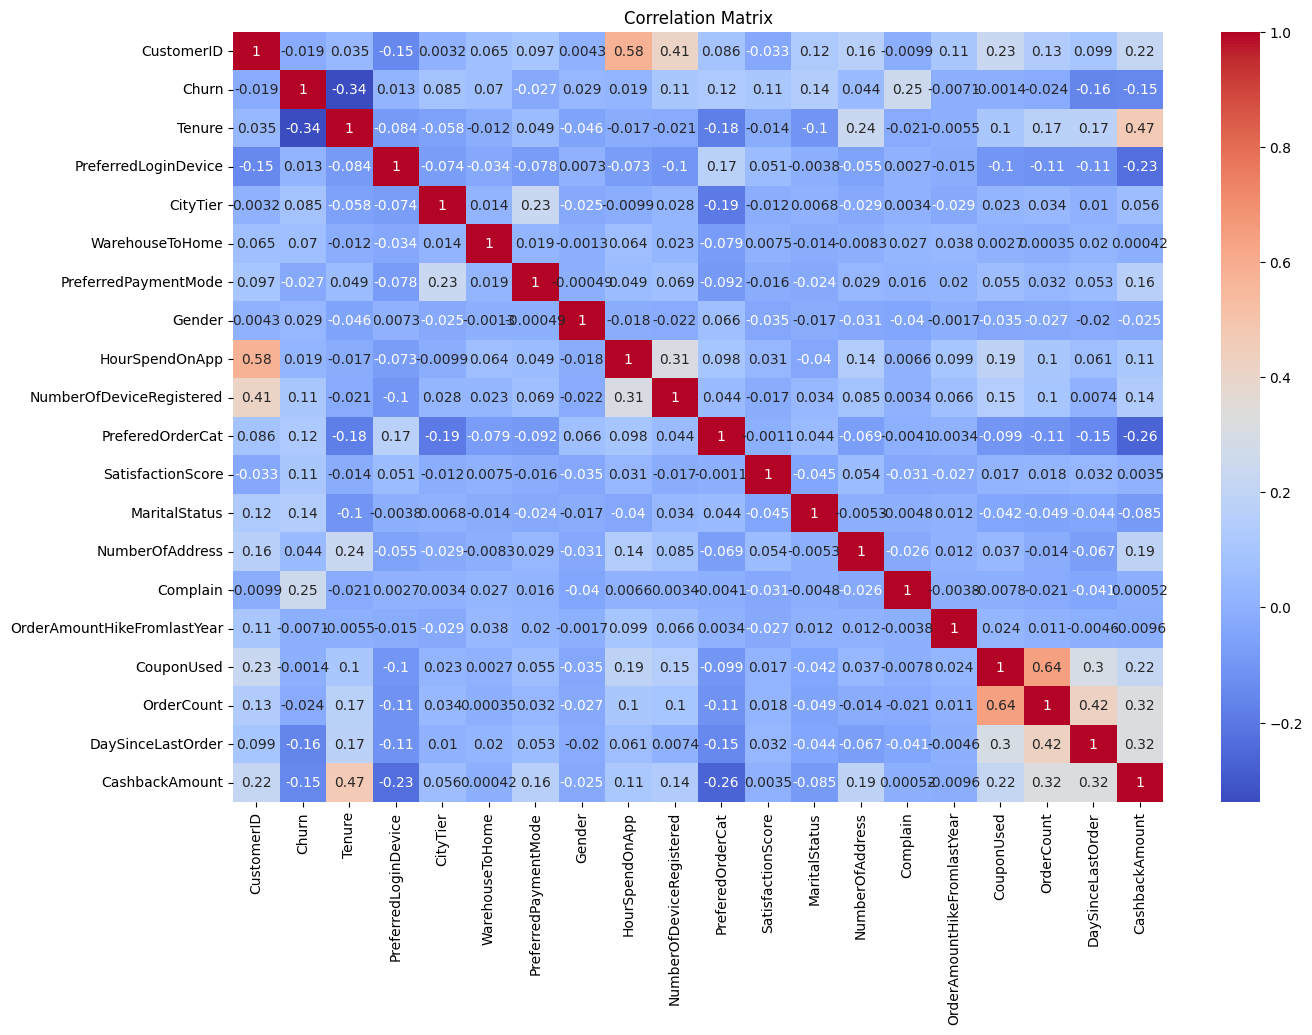

In [13]:
file_name = 'BA - Assignment Part 1 data set (5).xlsx'
df = pd.read_excel(io.BytesIO(uploaded[file_name]), sheet_name='E Comm')
# Clean and preprocess the data

# Impute missing values for numerical columns with median and categorical columns with mode
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

for column in df.columns:
    if df[column].dtype == 'object':  # Categorical
        df[column] = imputer_cat.fit_transform(df[[column]])
    else:  # Numerical
        df[column] = imputer_num.fit_transform(df[[column]])

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Standardize numerical variables
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Churn')  # Exclude target variable
df[num_cols] = scaler.fit_transform(df[num_cols])

# Conduct exploratory analysis to identify potential factors influencing churn

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Splitting dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature importance
importances = rf_classifier.feature_importances_
features = df.drop('Churn', axis=1).columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Displaying feature importance
print(importance_df)


              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       936
         1.0       0.96      0.83      0.89       190

    accuracy                           0.97      1126
   macro avg       0.96      0.91      0.93      1126
weighted avg       0.97      0.97      0.96      1126

Confusion Matrix:
 [[929   7]
 [ 32 158]]
ROC AUC Score: 0.9963900134952766
                        Feature  Importance
1                        Tenure    0.216677
18               CashbackAmount    0.097445
4               WarehouseToHome    0.068040
12              NumberOfAddress    0.064792
13                     Complain    0.061782
17            DaySinceLastOrder    0.058634
0                    CustomerID    0.058169
14  OrderAmountHikeFromlastYear    0.054111
10            SatisfactionScore    0.046295
5          PreferredPaymentMode    0.039005
9              PreferedOrderCat    0.038434
8      NumberOfDeviceRegistered    0.034435
11                Marital

**Model Evaluation:**
The RandomForestClassifier achieved an accuracy of 97% on the test set, with precision, recall, and F1-scores indicating strong performance across both classes (churned and not churned).
The ROC AUC Score is exceptionally high at approximately 0.996, suggesting excellent model performance in distinguishing between churned and not churned customers.

**Feature Importance:**
The top factors influencing customer churn, based on feature importance, are:

*Tenure*: The most important feature, indicating that the length of time a customer has been with the company significantly impacts their likelihood to churn.

*CashbackAmount*: The second most critical factor, suggesting that the amount of cashback a customer receives can influence their decision to stay or leave.

*WarehouseToHome*: Distance from the warehouse to the customer's home also plays a role, possibly affecting delivery times and satisfaction.

**Summary and Recommendations**:

**Tenure-Based Programs**
Early Engagement Offers: Implement a series of welcome offers for new sign-ups, such as exclusive discounts on their first few purchases or a welcome cashback bonus. This can help in immediately boosting their engagement and perceived value from the platform.

Milestone Rewards: Introduce milestone rewards for continued engagement. For example, after completing 3 months, 6 months, or a year, customers could unlock special offers or higher cashback percentages. This could also include access to premium services like expedited shipping or exclusive sales.

Loyalty Points System: Develop a loyalty points system where customers earn points for every purchase, which can be redeemed for discounts or free products. The rate at which points are earned could increase with the customer's tenure, encouraging long-term engagement.

**Cashback Amount Optimization**
Behavior-Based Cashback: Analyze purchasing behaviors to offer personalized cashback deals. For instance, customers frequently buying from a specific category (e.g., electronics) could receive higher cashback rates for that category.

Tiered Cashback Levels: Create a tiered cashback system where customers are placed into different tiers based on their purchase frequency or amount spent. Higher tiers could enjoy higher cashback rates, encouraging more frequent purchases.

Limited-Time Cashback Promotions: Run limited-time cashback promotions during festive seasons or special sales events. These promotions can be targeted based on customer preferences and previous shopping behavior to maximize engagement.

**Optimizing Delivery Experience**
Localized Warehouses: For customers far from warehouses, consider investing in localized distribution centers to reduce delivery times. This could significantly improve the shopping experience for a broad customer base.

Dynamic Delivery Options: Offer dynamic delivery options based on the distance from the warehouse, including same-day or next-day delivery for nearby customers. For those further away, provide accurate delivery time estimates and options for expedited shipping at a fee.

Enhanced Delivery Communication: Improve communication around delivery by providing real-time tracking, SMS updates, and flexible delivery scheduling. This can help set realistic expectations and improve customer satisfaction with the delivery process.


# Sentiment Analysis

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import re
import numpy as np
# Upload the Excel file
uploaded = files.upload()

Saving BA - Assignment Part 2 data set.csv to BA - Assignment Part 2 data set.csv


In [16]:
file_name = 'BA - Assignment Part 2 data set.csv'
df2 = pd.read_csv(io.BytesIO(uploaded[file_name]))
# Function to clean and tokenize text data
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    return ' '.join(tokens)

# Apply preprocessing to the review text
df2['Cleaned Review Text'] = df2['Review Text'].astype(str).apply(preprocess_text)

# Display the cleaned text
df2[['Review Text', 'Cleaned Review Text']].head()

# Sentiment analysis function using TextBlob
def get_sentiment(text):
    # Using TextBlob to get sentiment polarity
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis on cleaned review text
df2['Sentiment'] = df2['Cleaned Review Text'].apply(get_sentiment)

# Display the sentiment
df2[['Cleaned Review Text', 'Sentiment']].head()


,Cleaned Review Text,Sentiment
0,absolutely wonderful silky and sexy and comfor...,Positive
1,love this dress its sooo pretty i happened to ...,Positive
2,i had such high hopes for this dress and reall...,Positive
3,i love love love this jumpsuit its fun flirty ...,Positive
4,this shirt is very flattering to all due to th...,Positive


In [17]:
# Summarize the overall sentiment distribution
sentiment_distribution = df2['Sentiment'].value_counts(normalize=True) * 100

# Word frequency analysis function
def get_top_words(texts, n_top=10):
    vectorizer = CountVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform(texts)
    sum_words = matrix.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n_top]

# Identify key themes in positive feedback
positive_texts = df2[df2['Sentiment'] == 'Positive']['Cleaned Review Text']
top_positive_words = get_top_words(positive_texts, 10)

# Identify key themes in negative feedback
negative_texts = df2[df2['Sentiment'] == 'Negative']['Cleaned Review Text']
top_negative_words = get_top_words(negative_texts, 10)

sentiment_distribution, top_positive_words, top_negative_words


(Positive    90.317636
 Negative     5.679980
 Neutral      4.002384
 Name: Sentiment, dtype: float64,
 [('dress', 9867),
  ('love', 8745),
  ('size', 8160),
  ('fit', 7035),
  ('like', 6470),
  ('wear', 6082),
  ('great', 6028),
  ('im', 5661),
  ('just', 5260),
  ('fabric', 4441)],
 [('dress', 560),
  ('size', 522),
  ('like', 500),
  ('small', 495),
  ('wear', 321),
  ('im', 317),
  ('just', 299),
  ('fabric', 299),
  ('little', 271),
  ('ordered', 259)])

**Key Themes in Feedback**
**Positive Feedback Themes**:
Dress: Frequently mentioned in positive reviews, indicating satisfaction with dresses.

Love: A common word indicating strong positive feelings towards the products.
Size and Fit: Regularly discussed, suggesting that customers are generally satisfied with how products fit.

Wear: Indicates that customers find many items suitable for wearing on different occasions.

Great: Used to describe the overall quality and appeal of the products.

Fabric: Although it appears in both positive and negative contexts, in positive reviews, it might denote satisfaction with material quality.

**Negative Feedback Themes**:
Dress, Size, and Like: These also appear in negative feedback, suggesting issues with fit or expectations not being met for some dresses.

Small: Indicates issues with items being too small or sizing problems.
Fabric: In negative reviews, this might point to dissatisfaction with the material quality.

Little and Ordered: Could reflect on issues related to order fulfillment or product descriptions not matching the received item.

**Recommendations**
**Enhanced Quality Control for Fabric and Construction:**
Quality Assurance Teams: Establish dedicated quality assurance teams to perform thorough checks on the fabric and construction of each clothing item, especially those frequently mentioned in negative reviews.

Supplier Collaboration: Work closely with suppliers to ensure that the materials used meet specific quality standards. Consider developing fabric quality benchmarks that suppliers must meet or exceed.

**Improved Sizing Accuracy and Guidance:**
Virtual Sizing Assistant: Implement a virtual sizing assistant on the product pages that uses customer input (such as height, weight, and preferred fit) to recommend the best size for them.

Customer Fit Reviews: Encourage customers to share their body measurements along with their size reviews to help others make better sizing decisions. Offer incentives, such as loyalty points, for detailed reviews.

**Enhanced Product Descriptions and Visuals:**
360-Degree Product Views: Provide 360-degree views of products and videos of models wearing the items to offer customers a better understanding of the fit and flow of garments.

Material Descriptions: Include detailed descriptions of fabric types, weights, and care instructions. Use icons or visual guides to help customers quickly grasp the fabric qualities.

**Targeted Improvements Based on Feedback:**
Feedback Loop for Design Improvements: Establish a systematic process for incorporating customer feedback into product design and development. Regularly review negative feedback for insights that could lead to design modifications or enhancements.

Size and Fit Focus Groups: Conduct focus groups or surveys targeted at understanding common sizing issues. Use this data to adjust sizing charts or redesign products for a better fit.

**Customer Engagement and Retention Strategies:**
Engagement Programs for High-Value Customers: Develop personalized engagement programs for customers who provide valuable feedback, both positive and negative. This could include exclusive previews of new collections or the opportunity to participate in focus groups.

Responsive Customer Service: Enhance customer service training to ensure that representatives are well-equipped to handle feedback and complaints related to fabric, fit, and sizing. Quick and empathetic responses can turn negative experiences into positive ones.

**Leveraging Technology for Feedback Analysis:**
Sentiment Analysis Tools: Continuously monitor customer reviews using advanced sentiment analysis tools to quickly identify shifts in customer sentiment or emerging issues with specific products.

Data-Driven Product Adjustments: Use data analytics to correlate product returns and exchanges with specific feedback themes, enabling targeted adjustments to product lines or individual items.